<a href="https://colab.research.google.com/github/2024S2-ML/.github/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First, start with importing necessary python packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [ ]:
# Next, download the iris dataset as follows
iris = datasets.load_iris()
#print(iris.data[0])
X = iris.data
y = iris.target

In [ ]:
print("Keys of iris dataset: \n{}".format(iris.keys()))

Now, we need to read dataset to pandas dataframe

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris['target']
df.head(10)

In [ ]:
# sepal length X sepal width plotting (two columm dataset plotting)
import seaborn as sns
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=60, alpha=.9)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

In [ ]:
iris_target = dict(enumerate(iris['target_names']))
iris_target

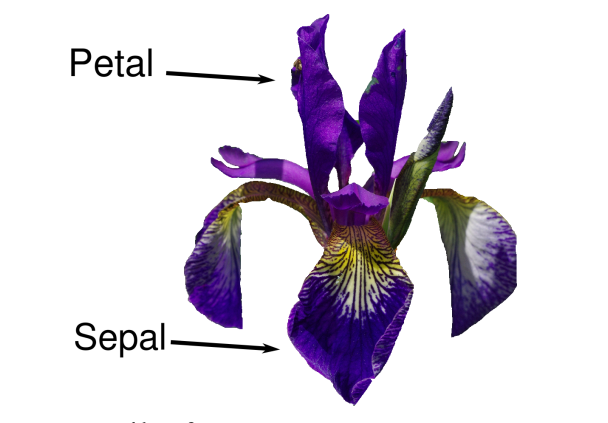

In [ ]:
df.shape

In [ ]:
df.describe()

# First Things First: Look at Your Data

Antes de construir um modelo de aprendizado de máquina, geralmente é uma boa ideia inspecionar os dados, para ver se a tarefa é facilmente solucionável sem aprendizado de máquina ou se as informações desejadas podem não estar contidas nos dados.

Além disso, inspecionar seus dados é uma boa maneira de encontrar anormalidades e peculiaridades. Talvez algumas de suas íris tenham sido medidas usando polegadas e não centímetros, por exemplo. No mundo real, inconsistências nos dados e medições inesperadas são muito comuns.

Uma das melhores maneiras de inspecionar dados é visualizá-los. Uma maneira de fazer isso é usando um gráfico de dispersão. Um gráfico de dispersão dos dados coloca um recurso ao longo do eixo x e outro ao longo do eixo y e desenha um ponto para cada ponto de dados. Infelizmente, as telas de computador têm apenas duas dimensões, o que nos permite plotar apenas dois (ou talvez três) recursos por vez. É difícil plotar conjuntos de dados com mais de três recursos dessa maneira. Uma maneira de contornar esse problema é fazer um gráfico de pares, que analisa todos os pares possíveis de recursos. Se você tiver um pequeno número de recursos, como os quatro que temos aqui, isso é bastante razoável. Você deve ter em mente, no entanto, que um gráfico de pares não mostra a interação de todos os recursos de uma vez, então alguns aspectos interessantes dos dados podem não ser revelados ao visualizá-los dessa forma.

A figura descreve um gráfico de pares dos recursos no conjunto de dados. Os pontos de dados são coloridos de acordo com a espécie à qual a íris pertence. Para criar o gráfico, primeiro convertemos o array NumPy em um DataFrame pandas. pandas tem uma função para criar gráficos de pares chamada scatter_matrix. A diagonal desta matriz é preenchida com histogramas de cada recurso.

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, c=y, alpha=0.6, figsize=(11, 11), marker='o', hist_kwds={'bins': 20}, s=40)
plt.show()

Em seguida, dividiremos os dados em divisão de treinamento e teste. O código a seguir dividirá o conjunto de dados em 70% de dados de treinamento e 30% de dados de teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Antes de fazer a divisão, a função train_test_split embaralha o conjunto de dados usando um gerador de números pseudoaleatórios. Se pegássemos apenas os últimos 30% dos dados como um conjunto de teste, todos os pontos de dados teriam o rótulo 2, pois os pontos de dados são classificados pelo rótulo (veja a saída para `iris['target']` mostrada anteriormente). Usar um conjunto de teste contendo apenas uma das três classes não nos diria muito sobre o quão bem nosso modelo generaliza,
então embaralhamos nossos dados para garantir que os dados de teste contenham dados de todas as classes.

Para garantir que obteremos a mesma saída se executarmos a mesma função várias vezes, fornecemos ao gerador de números pseudoaleatórios uma semente fixa usando o parâmetro random_state. Isso tornará o resultado determinístico, então esta linha sempre terá o mesmo resultado. Sempre corrigiremos o `random_state` dessa forma ao usar procedimentos randomizados.

A saída da função train_test_split é *X_train*, *X_test*, *y_train* e *y_test*, que são todos arrays NumPy. X_train contém 70% das linhas do conjunto de dados, e *X_test* contém os 30% restantes.

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

Em seguida, o dimensionamento dos dados será feito da seguinte forma

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Antes da padronização:

In [ ]:
X_train[0:10]

In [ ]:
# plot frist columm of dataset
plt.plot(X_train[:,0], X_train[:,1], 'o')
plt.show()

Após a padronização

In [ ]:
X_train_std[0:10]

In [ ]:
plt.plot(X_train_std[:,0], X_train_std[:,1], 'o')
plt.show()

Em seguida, treine o modelo com a ajuda da classe KNeighborsClassifier do sklearn

# Construindo seu primeiro modelo: k-vizinhos mais próximos
Agora podemos começar a construir o modelo de aprendizado de máquina real. Existem muitos algoritmos de classificação no `scikit-learn` que poderíamos usar. Aqui usaremos um classificador k-neighbors
neighbors, que é fácil de entender. Construir este modelo consiste apenas em
armazenar o conjunto de treinamento. Para fazer uma previsão para um novo ponto de dados, o algoritmo
encontra o ponto no conjunto de treinamento que está mais próximo do novo ponto. Então, ele atribui o
rótulo deste ponto de treinamento ao novo ponto de dados.

O *k* em *k-vizinhos mais próximos* significa que, em vez de usar apenas o vizinho mais próximo do novo ponto de dados, podemos considerar qualquer número fixo k de vizinhos no treinamento (por exemplo, os três ou cinco vizinhos mais próximos). Então, podemos fazer uma previsão usando a classe majoritária entre esses vizinhos.

Todos os modelos de aprendizado de máquina em `scikit-learn` são implementados em suas próprias classes, que são chamadas Estimatorclasses. O algoritmo de classificação *k-nearest neighbors* é implementado na classe KNeighborsClassifier no módulo neighbors. Antes
de podermos usar o modelo, precisamos instanciar a classe em um objeto. É quando definiremos quaisquer parâmetros do modelo. O parâmetro mais importante de `KNeighborsClassifier` é o número de vizinhos, que definiremos como 5

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train);

# Avaliando o modelo
É aqui que entra o conjunto de teste que criamos anteriormente. Esses dados não foram usados ​​para
construir o modelo, mas sabemos qual é a espécie correta para cada íris no conjunto de
teste.
Portanto, podemos fazer uma previsão para cada íris nos dados de teste e compará-la
com seu rótulo (a espécie conhecida). Podemos medir o quão bem o modelo funciona
calculando a *precisão*, que é a fração de flores para as quais a espécie correta
foi prevista.

In [ ]:
y_pred = knn.predict(X_test_std)
print("Test set predictions:\n{}".format(y_pred))

Em seguida, imprima os resultados e as métricas

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Last one the accuracy of predictions

In [ ]:
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Outra maneira de calcular a precisão:

In [ ]:
print("Test set score: {:.3f}".format(np.mean(y_pred == y_test)))

In [ ]:
y_pred == y_test

Para este modelo, a precisão do conjunto de teste é de cerca de 0,97, o que significa que fizemos a previsão correta
para 97% das íris no conjunto de teste. Sob algumas suposições matemáticas, isso significa que podemos esperar que nosso modelo esteja correto 97% das vezes para novas
íris. Para nossa aplicação de botânico amador, esse alto nível de precisão significa que nosso
modelo pode ser confiável o suficiente para ser usado.

# Fazendo previsões
Agora podemos fazer previsões usando este modelo em novos dados para os quais podemos não
conhecer os rótulos corretos. Imagine que encontramos uma íris na natureza com um comprimento de sépala de
6 cm, uma largura de sépala de 3 cm, um comprimento de pétala de 5 cm e uma largura de pétala de 2 cm.
Que espécie de íris seria essa? Podemos colocar esses dados em uma matriz NumPy, novamente
calculando a forma — isto é, o número de amostras (1) multiplicado pelo número de
características (4):

In [ ]:
X_new = np.array([[6, 3, 5, 2]])
print("X_new.shape: {}".format(X_new.shape))

In [ ]:
X_new_std = sc.transform(X_new)
X_new_std


In [ ]:
# Make prediction of new sample
prediction = knn.predict(X_new_std)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris['target_names'][prediction]))

###Respostas